<a href="https://colab.research.google.com/github/Nisarg13/RS_PROJECT1/blob/vikram/RS_CP1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_episodes = pd.read_csv('/content/drive/MyDrive/archive/episodes.csv')
df_headlines = pd.read_csv('/content/drive/MyDrive/archive/headlines.csv')
df_utterances_2sp = pd.read_csv('/content/drive/MyDrive/archive/utterances-2sp.csv')
df_utterances = pd.read_csv('/content/drive/MyDrive/archive/utterances.csv')

In [ ]:
df_headlines.head()

,id,headline
0,524288,"For Some, The Decision To Enlist Offers Direction"
1,524289,Whither The Astronauts Without A Shuttle?
2,524292,Tour Winner May Not Be First Over Finish Line
3,262153,California College Students Walk Out Of Class ...
4,524298,New Theory On 'Shaken Baby Syndrome'


In [ ]:
df_utterances_2sp.head()

,episode,episode_order,turn_order,speaker_order,host_id,is_host,utterance
0,1,1,0,0,0,True,The impeachment inquiry picks up tomorrow wher...
1,1,1,1,0,0,True,"Just this morning, the lawyer for the whistleb..."
2,1,1,2,0,0,True,There's are a lot of moving parts.
3,1,1,3,0,0,True,"Fortunately, NPR's Mara Liasson is here to help."
4,1,2,0,0,0,True,Good morning.


In [ ]:
u_2sp_list = df_utterances_2sp['utterance'].unique().tolist()


In [ ]:
df_utterances.head()

,episode,episode_order,speaker,utterance
0,57264,9,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...","It's a 2,200-mile race. To give some sense of ..."
1,57264,10,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...",So for a top competitor like Lance to try to m...
2,57264,11,"NEAL CONAN, host","So in every team, presumably there's one star,..."
3,57264,12,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...",That's right. Each team has nine riders. And w...
4,57264,13,"NEAL CONAN, host","So slipstream, this is like drafting in car ra..."


In [ ]:
df_utterances.shape

(3199858, 4)

In [ ]:
df_episodes.head()

,id,program,title,episode_date
0,98814,Morning Edition,Senate Ushers In New Year With 'Fiscal Cliff' ...,2013-01-01
1,98824,Morning Edition,Cheap Bubbly Or Expensive Sparkling Wine? Look...,2012-12-31
2,98821,Morning Edition,U.S. Gas Prices Reach Record Level In 2012,2013-01-01
3,98806,Morning Edition,House Approves 'Fiscal Cliff' Measure,2013-01-02
4,98823,Morning Edition,The Fiscal Cliff: A Love Story,2012-12-31


In [ ]:
from bs4 import BeautifulSoup
import re

def clean_text(text):
    # Remove HTML tags
    cleaned_text = BeautifulSoup(text, "html.parser").get_text()
    # Remove newline characters
    cleaned_text = re.sub(r'\n', ' ', cleaned_text)
    # Remove extra spaces
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

In [ ]:

df_utterances['utterance'] = df_utterances['utterance'].astype(str)
df_utterances_2sp['utterance'] = df_utterances_2sp['utterance'].astype(str)

# Apply the function to the 'title' column
df_episodes['title'] = df_episodes['title'].apply(clean_text)

# Convert 'episode_date' to datetime format and extract year, month, and day
df_episodes['episode_date'] = pd.to_datetime(df_episodes['episode_date'])
df_episodes['year'] = df_episodes['episode_date'].dt.year
df_episodes['month'] = df_episodes['episode_date'].dt.month
df_episodes['day'] = df_episodes['episode_date'].dt.day

title_list = df_episodes['title'].unique().tolist()

<ipython-input-10-6f614d5e2672>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  cleaned_text = BeautifulSoup(text, "html.parser").get_text()


In [ ]:
df_episodes.head()

,id,program,title,episode_date,year,month,day
0,98814,Morning Edition,Senate Ushers In New Year With 'Fiscal Cliff' ...,2013-01-01,2013,1,1
1,98824,Morning Edition,Cheap Bubbly Or Expensive Sparkling Wine? Look...,2012-12-31,2012,12,31
2,98821,Morning Edition,U.S. Gas Prices Reach Record Level In 2012,2013-01-01,2013,1,1
3,98806,Morning Edition,House Approves 'Fiscal Cliff' Measure,2013-01-02,2013,1,2
4,98823,Morning Edition,The Fiscal Cliff: A Love Story,2012-12-31,2012,12,31


In [ ]:
utterance_list = df_utterances['utterance'].unique().tolist()

In [ ]:
total_chars = 0
utterance_length = []
for i in range(len(utterance_list)):
  utterance_length.append(len(utterance_list[i]))
  total_chars += len(utterance_list[i])
print("Average length of utterance:", int(np.floor(total_chars / len(utterance_list))))

Average length of utterance: 223


In [ ]:
import matplotlib.pyplot as plt

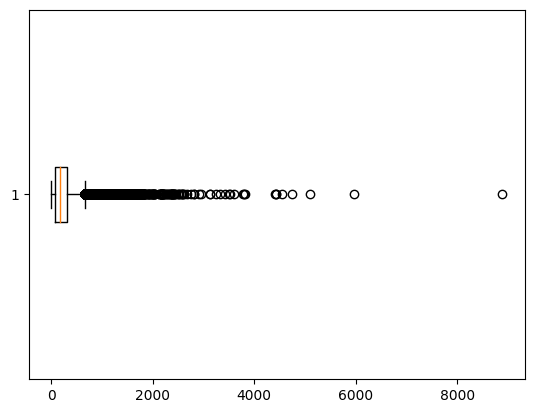

In [ ]:
plt.boxplot(utterance_length, vert=False)
plt.show()

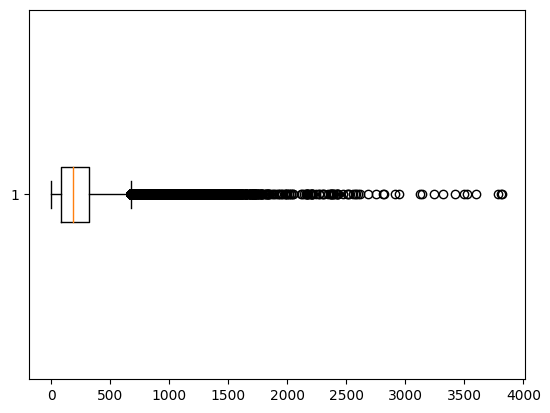

In [ ]:
without_outliers = []
for i in range(len(utterance_list)):
  if utterance_length[i] < 4000:
    without_outliers.append(utterance_length[i])

plt.boxplot(without_outliers, vert=False)
plt.show()

Half of the utterances in the radio talks are between 100 to 500 characters, or about 20 to 100 words. Most of the conversations are between 0 to 700 characters, or about 0 to 140 words spoken per speaker.

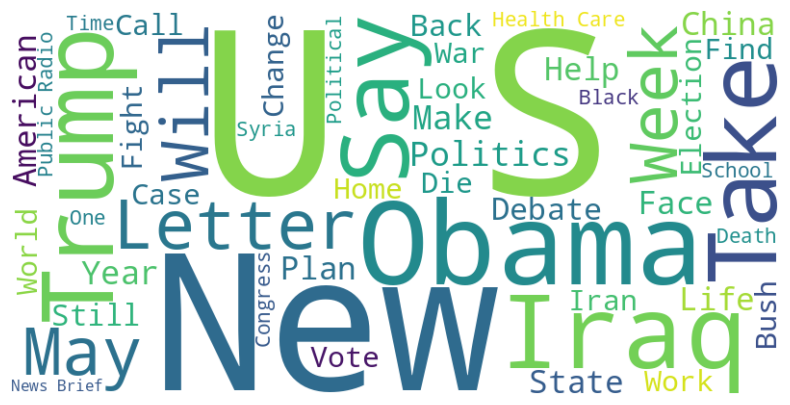

In [ ]:
from wordcloud import WordCloud

# Combine all titles into a single string
all_titles = ' '.join(df_episodes['title'].tolist())

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=50, contour_width=3, width=800, height=400).generate(all_titles)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

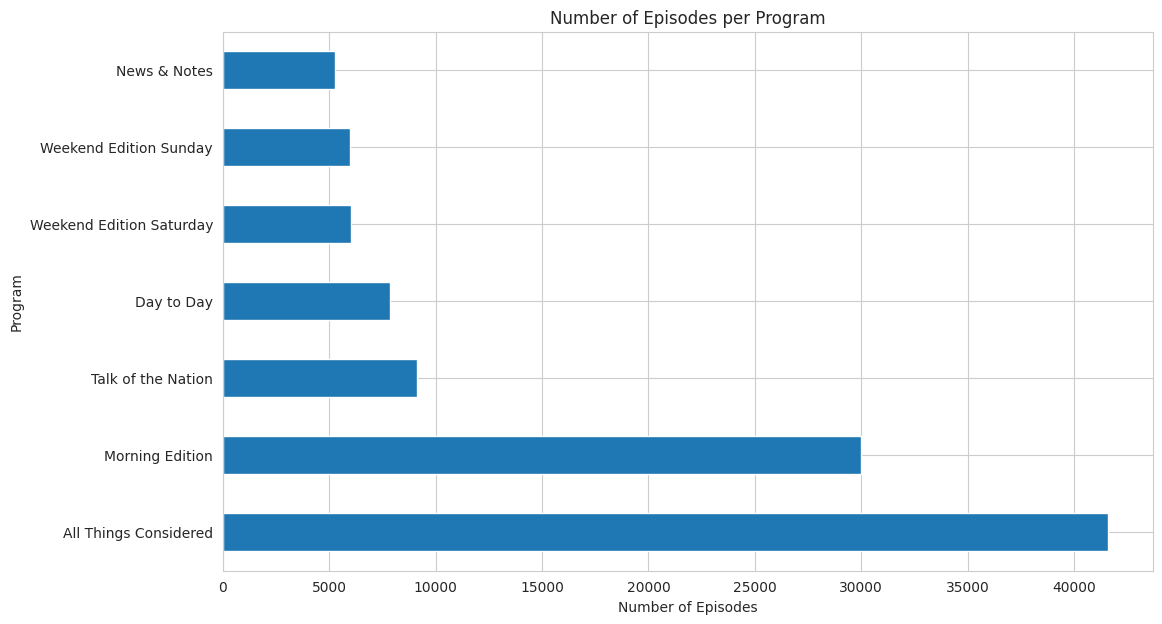

In [ ]:
# Episodes per program
plt.figure(figsize=(12, 7))
df_episodes['program'].value_counts().plot(kind='barh')
plt.title('Number of Episodes per Program')
plt.xlabel('Number of Episodes')
plt.ylabel('Program')
plt.show()

### Idea of knowing where most of our data is

This barplot shows that the programs 'Morning Edition' and 'All Things Considered' have a lot more episodes than any other program in this dataset. This has implications on what the user will be recommended: There is much more chance that they will be recommended one of these 2 programs than all other programs combined.

In [ ]:
df_ep_with_utterance = pd.merge(df_episodes, df_utterances, left_on='id', right_on='episode', how='outer')
df_ep_with_utterance['utt_length'] = df_ep_with_utterance['utterance'].astype(str).apply(len)

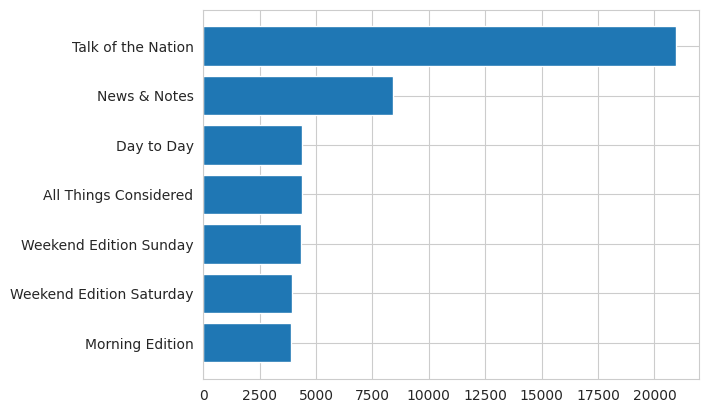

In [ ]:
df_by_pr_and_ep = df_ep_with_utterance.groupby(['program', 'title'])['utt_length'].sum().reset_index(name='Total words')
df_avg_ep_by_pr = df_by_pr_and_ep.groupby('program')['Total words'].mean().reset_index(name='Average words per episode')
df_avg_ep_by_pr.sort_values(by='Average words per episode', inplace=True)
plt.barh(data=df_avg_ep_by_pr, y='program', width='Average words per episode')
plt.show()

### Idea of knowing where the majority of the data is (contd)

However this provides another perspective about our data.

Talk of the Nation by far has the most number of words per episode. Combined with having the 3rd most number of episodes, it is the program that probably has the most content available, followed by All Things Considered and Morning Edition.

Visual Representation of the 100 most popular words in the title of these interviews. The size reflects on the frequency of these words spoken. One main reason the word count of utterances isn't included is because there are many words that are repeated throughout the interviews that distort the word count of these interviews and does not accurately reflect the topics of discussion.


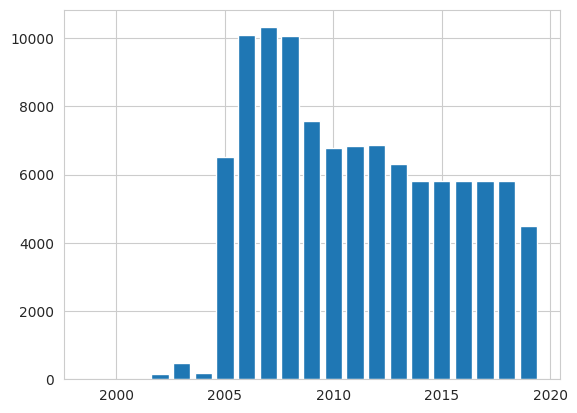

In [ ]:
df_ep_per_year = df_episodes.groupby('year')['year'].count().reset_index(name='Number of episodes')
plt.bar(data=df_ep_per_year, x='year', height='Number of episodes')
plt.show()

### Comparing episodes and content by year

This yearly plot shows that less episodes are shown from 1999 to 2004, so there is much less of a chance any of those episodes would be recommended.This is good, as users probably would not need radio interviews from older years, so there is much less chance they will be shown interviews from these 5 years.

However, there are a lot more episodes between the years 2005 and 2009 compared to more recent years. This could be because of the fact that radio interviews might be decreasing due to the technology becoming more and more outdated, regardless, people searching for episodes to be recommended are more likely to be shown interviews from this time period, which might have its biases of world views 15 years ago.

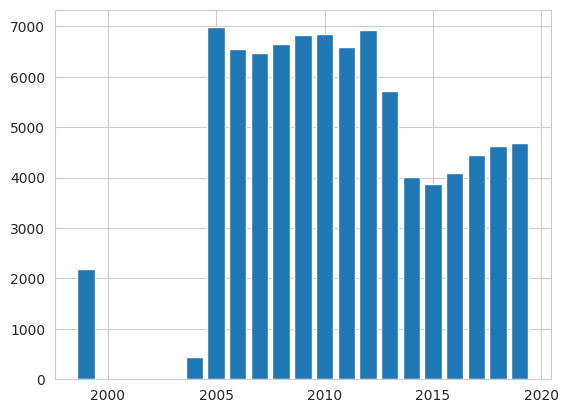

In [ ]:
df_by_year_and_ep = df_ep_with_utterance.groupby(['year', 'title'])['utt_length'].sum().reset_index(name='Total words')
df_avg_year_and_ep = df_by_year_and_ep.groupby('year')['Total words'].mean().reset_index(name='Average words per episode')
df_avg_year_and_ep.sort_values(by='Average words per episode', inplace=True)
plt.bar(data=df_avg_year_and_ep, x='year', height='Average words per episode')
plt.show()

### Comparing episodes and content by year (contd)

Going further, looking at the average words in an episode by year, we can see that the number of words in an episode was at its peak during the years 2005-2012, and from 2013 it has dropped drastically.

This further exacerbates the situation that much of the content that would probably be recommended to a user will be from the years 2005-2012